<font size="9"> **Tutorial for `pylis`** </font>

**NOTE: This notebook will eventually be replaced by notebooks per topic under the `tutorials` folder.**

`pylis` is a set a functions that I have been developing to make working with LIS output data easier. In this quick tutorial I give an overview of the functions you may find useful for your MSc thesis.

In [4]:
# enable loading in the necessary scripts
# use here the path where the pylis folder is located

import sys
sys.path.append("/data/leuven/340/vsc34049/PhD/scripts")

# Reading in data

The function `lis_cube()` from the `pylis.readers` module reads in data that is stored in the `SURFACEMODEL` folder of the LIS output. The main inputs are:

* `lis_dir`: where is the LIS output stored? This is the path provided in the `lis.config` file, i.e., don't include `"SURFACEMODEL"`;
* `lis_input_file`: the LDT output with the LIS domain. We need this for the latitude and longitude (these variables are masked over water in the LIS output);
* `var`: the variable for which to read in the data cube. Make sure to use the correct suffix (`_inst` or `_tavg`);
* `start`: first date of the data cube;
* `end`: last data of the data cube.

Let's read in the soil moisture data cube.

In [9]:
from pylis import readers

# we will need the lis_input file to obtain the latitude and longitude
lis_input_file = "/dodrio/scratch/projects/2022_200/project_output/rsda/vsc34049/nu-wrf/OL/lis_input.d02.nc"

# read in soil moisture data cube over US
dc_sm = readers.lis_cube(
    lis_dir = "/dodrio/scratch/projects/2022_200/project_output/rsda/vsc34049/output/amandine_usa",
    lis_input_file = lis_input_file,
    var = "SoilMoist_inst",
    start = "01/01/2002",
    end = "31/12/2019"
)

  0%|          | 0/6574 [00:00<?, ?it/s]

The resulting object is an `xr.DataArray` with in this case 4 dimensions: time, soil layer, and x- and y-direction of the grid. For a regular latitude-longitude grid, `x` and `y` will have a one-to-one correspondence with the longitude and latitude coordinates respectively, but this is not the case for this particular output, which is on a Lambert conformal grid. Hence, the `lat` and `lon` coordinates themselves are also two-dimensional on the `xy`-grid.

In [10]:
dc_sm

<xarray.DataArray (time: 6574, layer: 4, x: 159, y: 261)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ..., 0.32552108,
          0.24700135, 0.24725474],
         [       nan,        nan,        nan, ..., 0.24843347,
          0.24775058, 0.24762315],
         [       nan,        nan,        nan, ..., 0.24861398,
          0.24832916, 0.24810843]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [       nan,        nan,        nan, ..., 0.34959474,
          0.27670965, 0.27258494],
         [       nan,        nan,        nan, ..., 0.27490091,
          0.27590916, 0.27643037],
         [       nan,        nan,        nan, ..., 0.27201325,
          0.27327317, 0.27512181]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ..., 0.36058962,
          0.28973469, 0.28343806],
         [       nan,        nan,        nan, ..., 0.28703156,
          0.28850806, 0.28930801],
         [       nan,        nan,        nan, ..., 0.28263921,
          0.28447944, 0.28725883]]]])
Coordinates:
    lon      (x, y) float32 -120.8 -120.6 -120.5 -120.3 ... -67.91 -67.69 -67.46
    lat      (x, y) float32 22.8 22.84 22.87 22.91 ... 47.4 47.35 47.3 47.25
  * layer    (layer) int64 1 2 3 4
  * time     (time) datetime64[ns] 2002-01-01 2002-01-02 ... 2019-12-31
Dimensions without coordinates: x, y
Attributes:
    description:  LIS model output
    variable:     SoilMoist_inst

You can always use `?` to find out more about a function.

In [ ]:
from pylis import readers
?readers.lis_cube

Signature:
readers.lis_cube(
    lis_dir,
    lis_input_file,
    var='SoilMoist_inst',
    h=0,
    d='01',
    start='01/04/2015',
    end='31/12/2020',
    freq='1D',
)
Docstring:
Read data cube of LIS model output

:param str lis_dir: parent directory of the LIS output
:param str lis_input_file: path to LIS input file containing the lat/lon information
:param str var: which variable to read in the data cube for
:param int h: UTC time at which LIS outputs (e.g. daily outputs at 12 UTC: h = 12)
:param str d: domain (in filename)
:param str start: start of the data cube (format "DD/MM/YYYY")
:param str end: end of the data cube (format "DD/MM/YYYY")
:param str freq: temporal resolution of the output
File:      /data/leuven/340/vsc34049/PhD/scripts/pylis/readers.py
Type:      function


# Plotting data

The module `pylis.visualization` has a function `map_imshow` which takes input in the `xr.DataArray` format and creates a map. For example, we can plot the mean soil moisture of the surface layer as follows:

/data/leuven/340/vsc34049/miniconda/envs/default_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


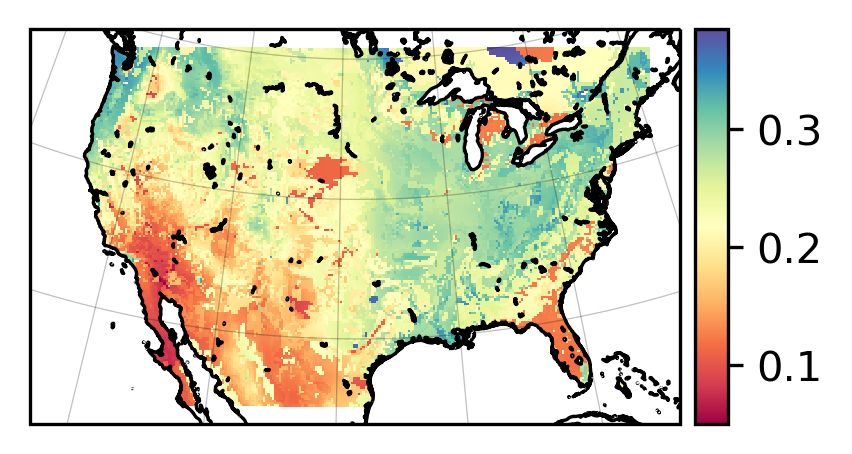

In [16]:
from pylis import visualization as vis
import cartopy.crs as ccrs

vis.map_imshow(
    dc_sm.sel(layer = 1).mean(dim = "time"),
    projection = ccrs.LambertConformal(central_longitude = -98.3, central_latitude = 38.5),
    cmap = "Spectral", 
    xmax = None,
    dpi = 300
)

Note that I had the `projection` argument here to the same one as the one of the LIS output data. For a regular lat-lon grid, you would choose `ccrs.PlateCarree()`. An overview of all projections is listed here: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html.

The `xmax` option was set to None because the function defaults to a crop around Europe otherwise.

# Simple calculations

There is a useful function to quickly compute the root-zone soil moisture from a soil moisture data cube with 4 layers:

In [19]:
from pylis.help import root_zone

dc_sm_rootzone = root_zone(dc_sm)

This data cube has now 'lost' its `layer` dimension:

In [24]:
dc_sm_rootzone

<xarray.DataArray (time: 6574, x: 159, y: 261)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.33018863,
         0.25578192, 0.25613553],
        [       nan,        nan,        nan, ..., 0.25743554,
         0.25677183, 0.25663185],
        [       nan,        nan,        nan, ..., 0.25783704,
         0.25750952, 0.25724609]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 0.34751182,
         0.27302237, 0.26918201],
        [       nan,        nan,        nan, ..., 0.27133151,
         0.27227689, 0.27275954],
        [       nan,        nan,        nan, ..., 0.26865029,
         0.26982868, 0.27154918]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.34686303,
         0.27188388, 0.26820079],
        [       nan,        nan,        nan, ..., 0.27026616,
         0.27117053, 0.27163281],
        [       nan,        nan,        nan, ..., 0.26768664,
         0.26881915, 0.27047146]]])
Coordinates:
    lon      (x, y) float32 -120.8 -120.6 -120.5 -120.3 ... -67.91 -67.69 -67.46
    lat      (x, y) float32 22.8 22.84 22.87 22.91 ... 47.4 47.35 47.3 47.25
    layer    int64 1
  * time     (time) datetime64[ns] 2002-01-01 2002-01-02 ... 2019-12-31
Dimensions without coordinates: x, y

Let's read in the LAI as well:

In [18]:
from pylis import readers

# we will need the lis_input file to obtain the latitude and longitude
lis_input_file = "/dodrio/scratch/projects/2022_200/project_output/rsda/vsc34049/nu-wrf/OL/lis_input.d02.nc"

# read in soil moisture data cube over US
dc_lai = readers.lis_cube(
    lis_dir = "/dodrio/scratch/projects/2022_200/project_output/rsda/vsc34049/output/amandine_usa",
    lis_input_file = lis_input_file,
    var = "LAI_inst",
    start = "01/01/2002",
    end = "31/12/2019"
)

  0%|          | 0/6574 [00:00<?, ?it/s]

We can compute simple statistics such as the correlation between the root-zone soil moisture and the LAI through xarray's built-in functionalities:

In [27]:
import xarray as xr

corr_lai_rzsm = xr.corr(dc_sm_rootzone, dc_lai, dim = "time")

/data/leuven/340/vsc34049/miniconda/envs/default_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/leuven/340/vsc34049/miniconda/envs/default_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


The following map shows regions of positive correlation in blue and negative correlation in red.

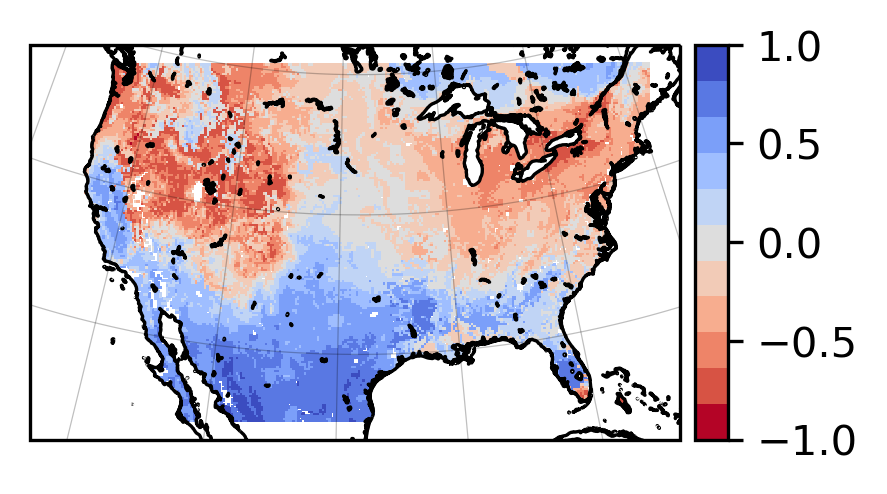

In [32]:
from pylis import visualization as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

vis.map_imshow(
    corr_lai_rzsm,
    projection = ccrs.LambertConformal(central_longitude = -98.3, central_latitude = 38.5),
    cmap = plt.get_cmap("coolwarm_r", 11),
    vmin = -1, vmax = 1, 
    xmax = None,
    dpi = 300
)